In [1]:
"""Creates the input event pattern for the network. It generates:
- 5 seconds of 1Hz sinusoidal wave (5 periods) events
- 5 seconds of 2Hz sinusoidal wave (10 period) events
Events are synchronized using a startTrigger and stopTrigger
Output target is directly encoded in the input pattern
"""

import os
os.chdir("/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic")



import numpy as np
import matplotlib.pyplot as plt
from dynapseReservoir.networks.inputsParameters import in_5_0_P
from dynapseReservoir.networks.reservoirsParameters import generalNetP 
import DYNAPSETools.dynapseSpikesGenerator as DSG

# the output file that reford the spikes
fileName = "/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic/caer/myStimulus/in_pulse.txt"



In [2]:

np.random.seed(in_5_0_P["seed"])

plt.close("all")

startDelay = 0.5
#======================  Create events
# Start experiment event
startTrigger = DSG.InputPattern(name = "startTrigger", isiBase = in_5_0_P["isiBase"])
U, C, N = generalNetP["inStartTriggerPos"]
startTrigger.single_event(virtualSourceCoreId = C,
                          neuronAddress = N,
                          coreDest = in_5_0_P["coreDest"],
                          firePeriod = in_5_0_P["startDelay"])
#                           firePeriod = startDelay)

# Out neuron 1 classification
onesClassification = DSG.InputPattern(name = "onesClassification", isiBase = in_5_0_P["isiBase"])
U, C, N = generalNetP["inTargetEncodingPos"]
onesClassification.single_event(virtualSourceCoreId = C,
                                neuronAddress = N,
                                coreDest = in_5_0_P["coreDest"],
#                                 firePeriod = in_5_0_P["safeDelay"])
                          firePeriod = startDelay)
    

# A constant spike event that is not connect to the real neuron 
constantSpike = DSG.InputPattern(name = "constantSpike", isiBase = in_5_0_P["isiBase"])
U, C, N = generalNetP["inCH4"] # U04C00N24
constantSpike.single_event(virtualSourceCoreId = C,
                         neuronAddress = N,
                         coreDest = in_5_0_P["coreDest"],
                         firePeriod = in_5_0_P["safeDelay"])


# Stop experiment event
endStimulus = DSG.InputPattern(name = "endStimulus", isiBase = in_5_0_P["isiBase"])
U, C, N = generalNetP["inEndStimulusPos"]
endStimulus.single_event(virtualSourceCoreId = C,
                         neuronAddress = N,
                         coreDest = in_5_0_P["coreDest"],
                         firePeriod = in_5_0_P["safeDelay"])

# Stop experiment event
stopTrigger = DSG.InputPattern(name = "stopTrigger", isiBase = in_5_0_P["isiBase"])
U, C, N = generalNetP["inStopTriggerPos"]
stopTrigger.single_event(virtualSourceCoreId = C,
                         neuronAddress = N,
                         coreDest = in_5_0_P["coreDest"],
                         firePeriod = in_5_0_P["stopDelay"])


#%%

# Create first signal type
signal1 = DSG.InputPattern(name = "signal1", isiBase = in_5_0_P["isiBase"])


# Part2
tStart = tStop = 0
tStop += in_5_0_P["sig1part2Duration"]
tSig1Part2 = np.linspace(tStart, tStop, in_5_0_P["sigSamples"])

#spikeLen = 10000  # the spike lasts for 10000 microsecond, which is 0.01 second

spikeLen = int(len(tSig1Part2))

ySig1Part2_1 = 5*tSig1Part2[:spikeLen] 
ySig1Part2_2 = np.zeros( len(tSig1Part2) - spikeLen)
ySig1Part2 = np.append(ySig1Part2_1, ySig1Part2_2) 
          

# Part3
tStart = tStop
tStop += in_5_0_P["sig1part3Duration"]
tSig1Part3 = np.linspace(tStart, tStop, in_5_0_P["sigSamples"])
ySig1Part3 = np.zeros(len(tSig1Part3))

tSig1 = np.ndarray.flatten(np.array([tSig1Part2, tSig1Part3]))
ySig1 = np.ndarray.flatten(np.array([ySig1Part2, ySig1Part3]))

U, C, N1 = generalNetP["inCH0"]
U, C, N2 = generalNetP["inCH1"]


signal1.threshold_encoder(virtualSourceCoreId = C,
                          neuronAddressUpCH = N1,  
                          neuronAddressDwCH = N2,  
                          coreDest = in_5_0_P["coreDest"],   
                          threshold = in_5_0_P["sigThd"],    
                          t = tSig1,    
                          y = ySig1,    
                          noiseVar = in_5_0_P["sig1Jitter"],      
                          initDelay = in_5_0_P["sig1Delay"])  


#%%
signal2 = DSG.InputPattern(name = "signal2", isiBase = in_5_0_P["isiBase"])
tSig2 = np.linspace(0, 5, in_5_0_P["sigSamples"]) # last for 5 seconds
ySig2 = tSig2

U, C, N1 = generalNetP["inCH0"]
U, C, N2 = generalNetP["inCH1"]
U, C, N3 = generalNetP["inCH3"] # U04C00N24
U, C, N4 = generalNetP["inCH4"] # U04C00N24

signal2.threshold_encoder(virtualSourceCoreId = C,
                          neuronAddressUpCH = N3,
                          neuronAddressDwCH = N4,
                          coreDest = in_5_0_P["coreDest"],
                          threshold = in_5_0_P["sigThd"],
                          t = tSig2,
                          y = ySig2,
                          noiseVar = in_5_0_P["sig2Jitter"],
                          initDelay = in_5_0_P["sig2Delay"])


finalPattern = [startTrigger,
                 onesClassification,
                 signal1,
                 endStimulus,
                 constantSpike,
                 signal2,
                 endStimulus,
                 stopTrigger]

# ====================== Write events to output file in cAER folder
DSG.write_to_file(*finalPattern, fileName = fileName)



/Users/liutianlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/liutianlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/liutianlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Checking and writing pattern startTrigger
Current pattern lenght is 1
Cumulative pattern lenght is 1. Remaining 32766 events
Pattern startTrigger succesfully written

Checking and writing pattern onesClassification
Current pattern lenght is 1
Cumulative pattern lenght is 2. Remaining 32765 events
Pattern onesClassification succesfully written

Checking and writing pattern signal1
Current pattern lenght is 35
Cumulative pattern lenght is 37. Remaining 32730 events
Pattern signal1 succesfully written

Checking and writing pattern endStimulus
Current pattern lenght is 1
Cumulative pattern lenght is 38. Remaining 32729 events
Pattern endStimulus succesfully written

Checking and writing pattern constantSpike
Current pattern lenght is 1
Cumulative pattern lenght is 39. Remaining 32728 events
Pattern constantSpike succesfully written

Checking and writing pattern signal2
Current pattern lenght is 34
Cumulative pattern lenght is 73. Remaining 32694 events
Pattern signal2 succesfully written



/Users/liutianlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


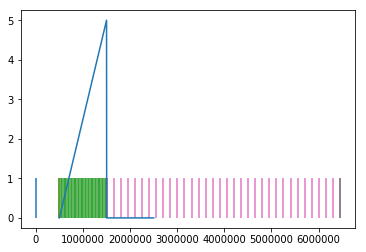

In [3]:

fig, ax1, handles = DSG.plot_spikes(*finalPattern)
# delay = in_5_0_P["startDelay"] + in_5_0_P["safeDelay"] + in_5_0_P["sig1Delay"]
delay = startDelay + in_5_0_P["safeDelay"] + in_5_0_P["sig1Delay"]
handle = ax1.plot((np.linspace(0, in_5_0_P["sig2Duration"], 2*in_5_0_P["sigSamples"]) + delay)*1e6, np.array(list(ySig1)))



In [9]:
delay

0.502